# How grade is affected by students behaviour and environment
## by Wilfred Njeunwi Tagha


## Investigation Overview
> I'm interested in the students activities that can be used for predicting the grade of the student and the environment that can be used for predicting the activities of the student.
> The activities of interest are absences, outing(goout), Dringking(Dalc and Walc) and studytime while the environment of interest are family relations, Age, Sex and freetime.

## Dataset Overview
> > This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. This dataset has 649 records and 33 features. Most of the variables are categorical. About five columns are numerical such as absences, grades(G1, G2 and G3) and age. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
portuguese_df = pd.read_csv("Portuguese.csv")
base_color = sb.color_palette()[0]

In [3]:
#Category orders for different columns
good_order = ["very bad", "bad", "moderate", "good", "very good"]
high_order = ["very low", "low", "moderate", "high", "very high"]
quality_order = ["very bad", "fair", "good", "very good", "Excellent"]
study_time_order = ["<2 hours", "2 to 5 hours", "5 ot 10 hours", "> 10 hours"]

In [4]:
#Here is a function to change categories from numbers to thier proper names.
def rename_categories(column, order):
    """ gets the column of a dataframe and change it to a more descriptive ordered category given that it has orderd numeric values"""
    new = []
    for number in portuguese_df[column]:
        new.append(order[int(number)-1])
    portuguese_df[column]= new
    portuguese_df[column]=portuguese_df[column].astype(pd.api.types.CategoricalDtype(ordered = True,
                                                categories = order))

In [5]:
rename_categories("Walc", high_order)
rename_categories("freetime", high_order)
rename_categories("goout", high_order)
rename_categories("Dalc", high_order)
rename_categories("famrel", quality_order)
rename_categories("studytime", study_time_order)

## Grade Distribution
> The grades have a normal distributions with the mode 10.



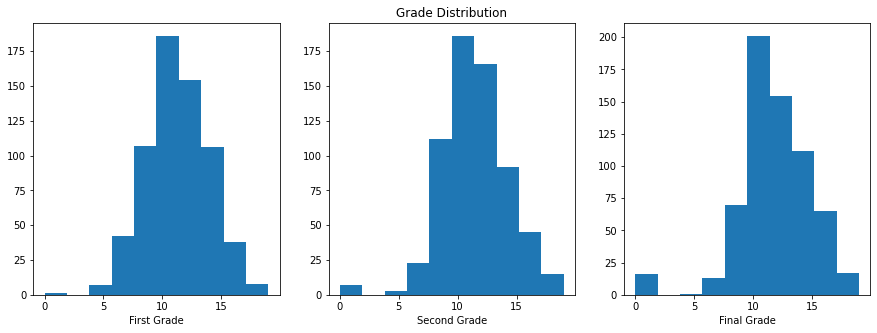

In [6]:
fig, ax = plt.subplots( ncols=3, figsize = [15,5])

ax[0].hist(data = portuguese_df, x = 'G1')
ax[1].hist(data = portuguese_df, x = 'G2')
ax[2].hist(data = portuguese_df, x = 'G3')
ax[0].set_xlabel("First Grade")
ax[1].set_xlabel("Second Grade")
ax[2].set_xlabel("Final Grade")
ax[1].set_title("Grade Distribution")

plt.show()

## Gender Distribution

> Females are more than males
> Females cover 59 percent of the data while males cover 41.

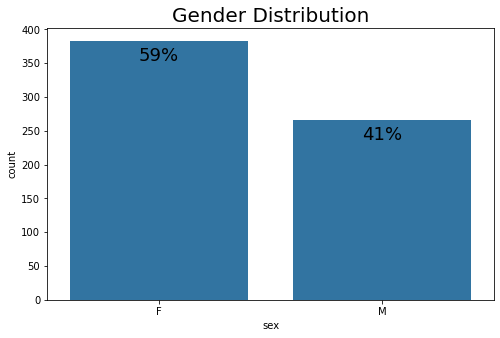

In [7]:

plt.figure(figsize=(8,5))
total = float(len(portuguese_df))
ax = sb.countplot(x="sex", data=portuguese_df, color = base_color)
plt.title('Gender Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() - 30
    ax.annotate(percentage, (x, y),ha='center', size=18)
    ax.grid(False)

plt.show()

## Effect of studytime on Grade.
> An increase in study time leads to an increase in Grades. However after 10 hours, it seems to be stagnant. 



Text(0.5, 0, 'Study Time')

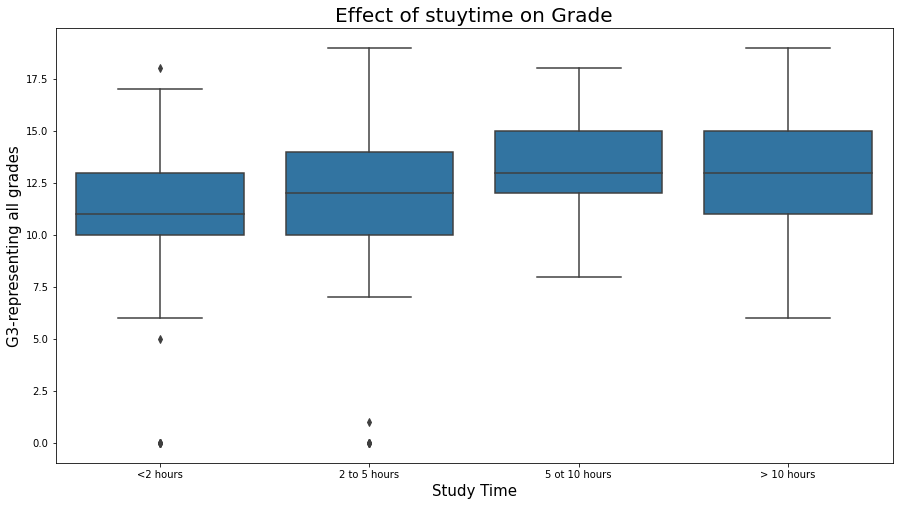

In [8]:
plt.figure(figsize = (15,8))
sb.boxplot(data=portuguese_df, x='studytime', y='G3', color=base_color)
plt.title("Effect of stuytime on Grade",fontsize=20)
plt.ylabel("G3-representing all grades",fontsize=15)
plt.xlabel("Study Time", fontsize=15)

## The effect of study time on grade for each gender
> For females, an increase in study time proves to have an increase effect on grades.
> For males, an increase in study time only proves to have an increase effect on grades up to 10 hours. After which, the grades drop.


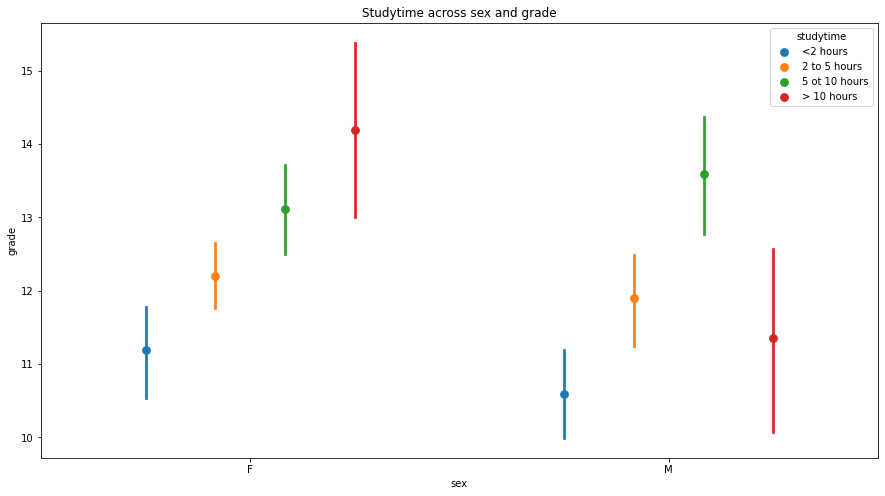

In [9]:
fig = plt.figure(figsize = [15,8])
ax = sb.pointplot(data = portuguese_df, x = 'sex', y = 'G3', hue = 'studytime',
            linestyles = '', dodge = 0.5)
plt.title('Studytime across sex and grade')
plt.ylabel('grade')
ax.set_yticklabels([],minor = True)
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 